# why ROC Curve

threshold selection :(generally used for classification problem)

he ROC curve helps in analyzing the performance of a model across different thresholds. This is particularly useful because the performance of a classifier can vary depending on the threshold used for making decisions.

In [ ]:
Example : why we need the selection of threshold

supose in spam or not spam email selection model 
if the not spam showing as the spam mail(mean it going to false positive)
so that mail can be important we don want misss that mail
in that case roc curve will help you select the your threshols VALUE OF PROBILITY SO YOU CAN DECIDE IF THE PROBABIITY GOES CERTAIN POINT THEN SAY THIS MAIL AS THE SPAM OTHEWISE SAY AS NON-SPAM

in classification the ideal case for threshold is 0.5 if below 0.5 say NO if above 0.5 say yes


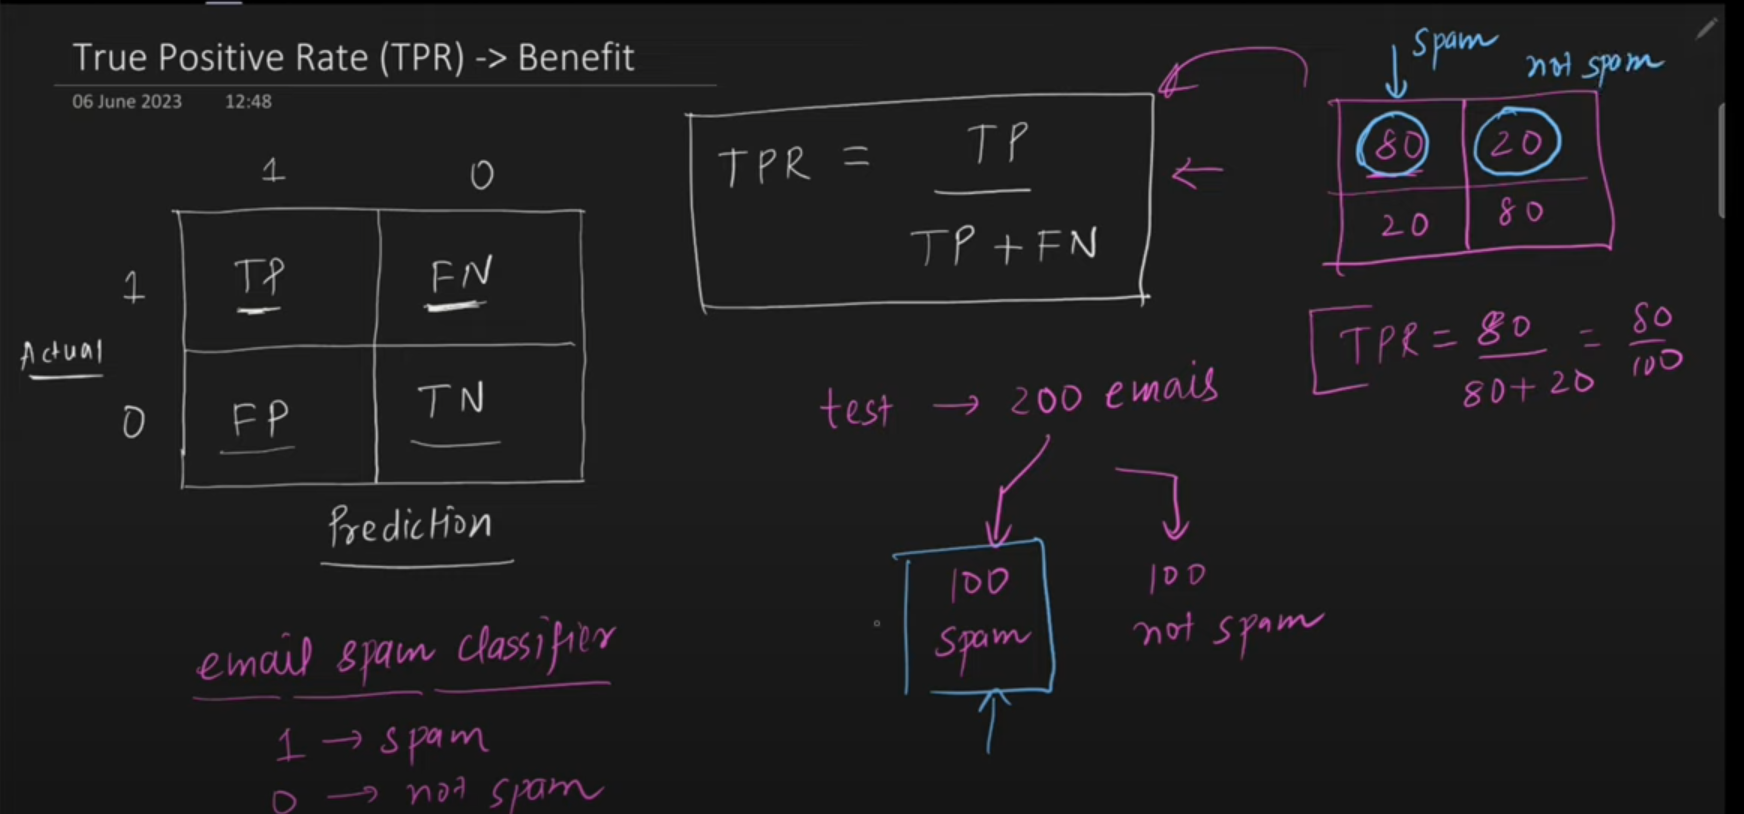

ex. mail spam and not spam

TPR : say that  out of all spam mail how much mail we predicted as the spam

(and tpr will help you to know are benifited from your model or not)

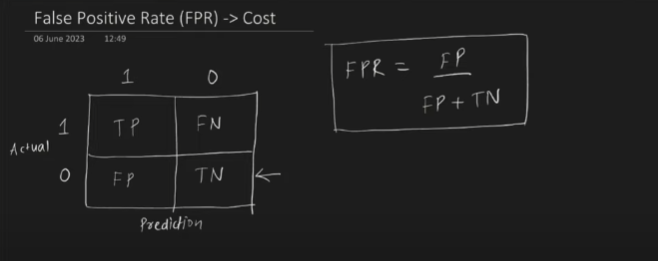

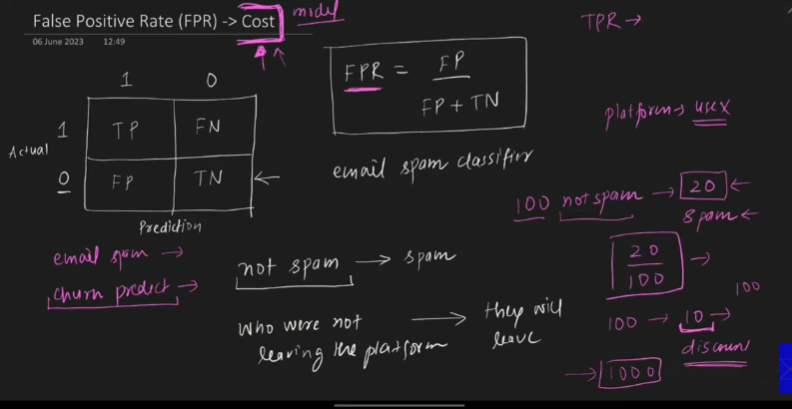

# Reciever operating Characteristics(ROC)

graph between the TPR and FPR called as the roc curve

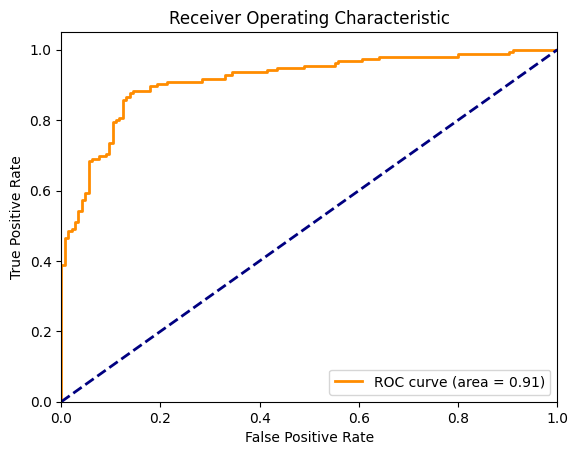

In [5]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [6]:
# To get optimal threshold
optimal_threshold_idx = np.argmax(tpr-fpr)
print("optimal threshold ", threshold[optimal_threshold_idx])

optimal threshold  0.43035701807363447


```from above graph will choose the closed point toward the TPR```

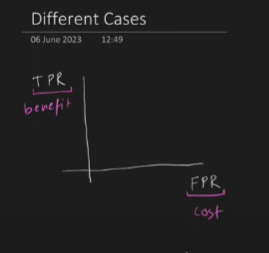

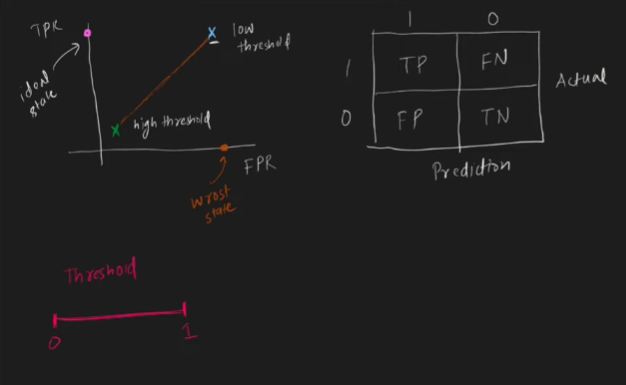

# multiclass

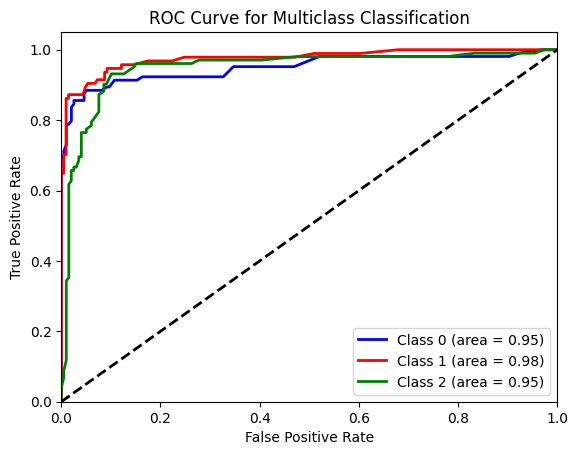

In [3]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Generate a multiclass classification dataset with appropriate constraints
X, y = make_classification(n_samples=1000, n_features=20, n_informative=3, 
                           n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a One-vs-Rest Random Forest classifier
classifier = OneVsRestClassifier(RandomForestClassifier())
classifier.fit(X_train, y_train)

# Predict probabilities
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


ROC_AUC :  is use to compair the two seprate model

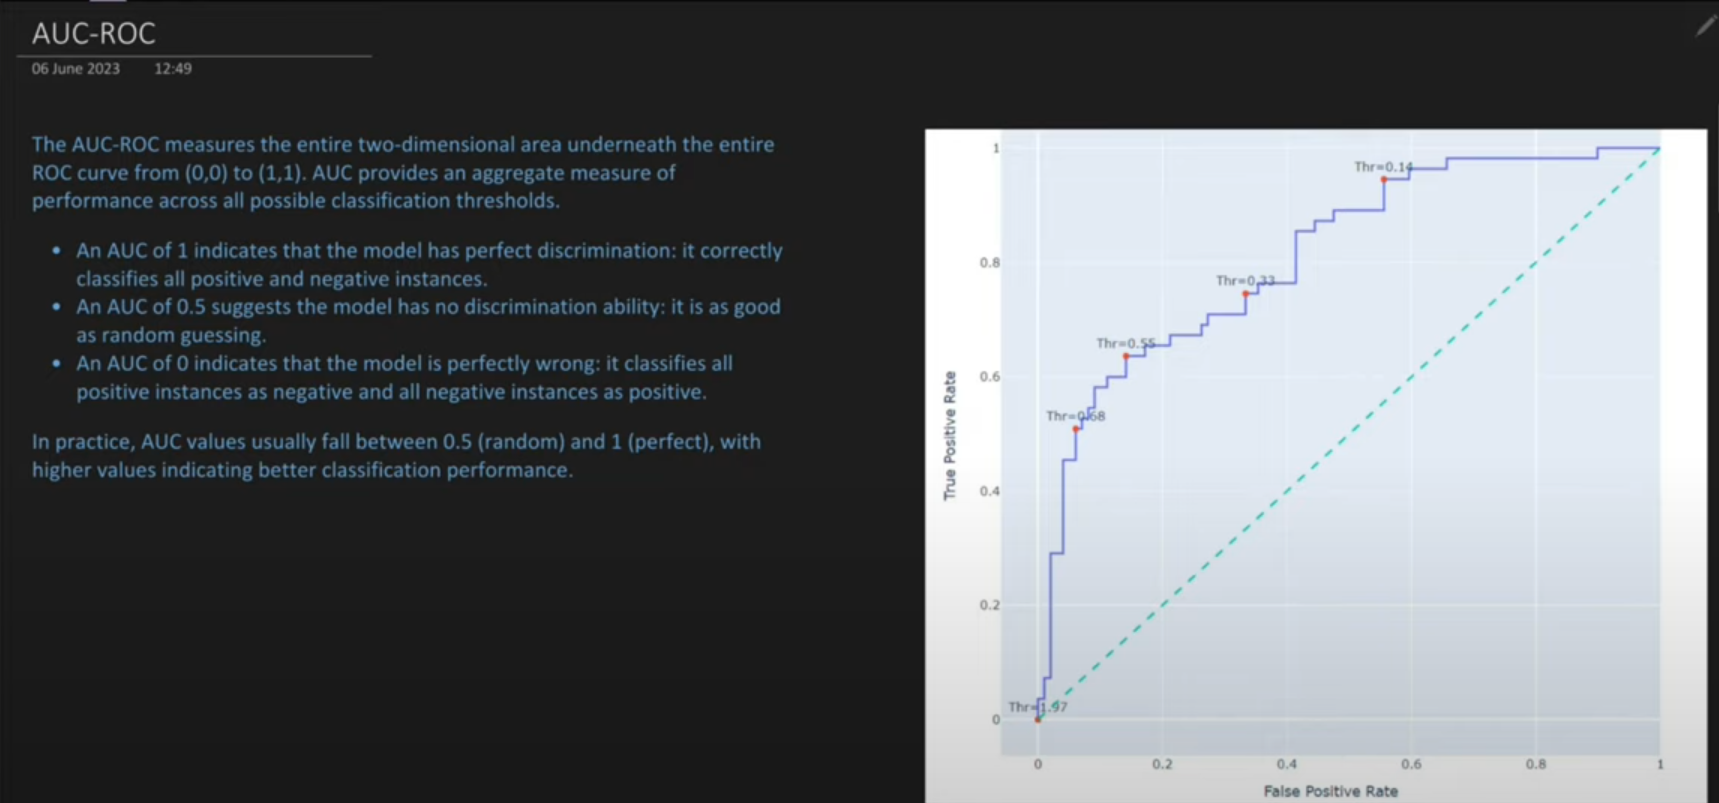

